# Inspección del dataset [en Big Data]

Antes de empezar a trabajar con un dataset es necesario realizar un análisis de los datos EDA (Exploratory Data Analysis). Será necesario ver si faltan datos, si son coherentes y transformarlos para poder aplicar los modelos de Machine Learning con mejores resultados y de manera más eficiente y rápida.

In [ ]:
# Importamos las librerias que necesitamos
import pandas as pd
import numpy as np

In [ ]:
# Subimos el dataset
# extraído de https://archive.ics.uci.edu/ml/datasets/Adult
df = pd.read_csv('adult.csv', header=0)
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'gains'],
      dtype='object')


Es importante saber qué representa cada feature. Por ejemplo, busca en Google 'fnlwgt' (https://www.kaggle.com/datasets/uciml/adult-census-income/discussion/32698)

In [ ]:
# Observamos de manera visual cómo son nuestros datos y cómo están estructurados
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains
0,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
1,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
2,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
3,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
4,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32559 non-null  float64
 1   workclass       32560 non-null  object 
 2   fnlwgt          32560 non-null  int64  
 3   education       32560 non-null  object 
 4   education-num   32554 non-null  float64
 5   marital-status  32560 non-null  object 
 6   occupation      32560 non-null  object 
 7   relationship    32560 non-null  object 
 8   race            32560 non-null  object 
 9   sex             32560 non-null  object 
 10  capital-gain    32560 non-null  int64  
 11  capital-loss    32560 non-null  int64  
 12  hours-per-week  32552 non-null  float64
 13  native-country  32560 non-null  object 
 14  gains           32560 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32559.000000,3.256000e+04,32554.000000,32560.000000,32560.000000,32552.000000
mean,38.582266,1.897818e+05,10.080482,1077.615172,87.306511,40.438345
std,13.640374,1.055498e+05,2.572830,7385.402999,402.966116,12.346980
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## DataPrep
Para un análisis más completo podemos utilizar alguna erramienta como DataPrep

https://medium.com/spatial-data-science/4-tools-to-speed-up-exploratory-data-analysis-eda-in-python-e240ebcd18de

In [ ]:
!pip install dataprep

DataPrep Report
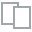
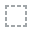
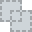
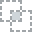
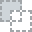
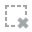
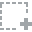
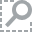
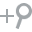
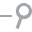
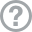
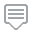
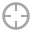
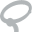
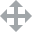
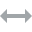
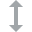
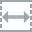
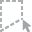
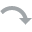
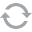
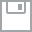
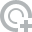
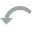
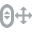
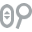
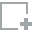
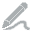
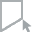
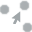
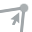
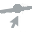

In [ ]:
from dataprep.eda import create_report

from sklearn.datasets import load_wine

wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine_target = pd.DataFrame(wine.target, columns = ['categoria'])

df_wine = df_wine.join(df_wine_target)

#df_wine.sample(5)

create_report(df_wine)



# Preprocesado de datos [en Big Data]

##Datos categóricos

### Sustitución [sex]

In [ ]:
# Vamos a modificar el feature sex que es categórico
# Mostramos los valores que puede tomar:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [ ]:
# Vamos a crear una nueva columna
df['Sex'] = df['sex'].replace({'Male': 1, 'Female': 0})
# otra forma:
# df['Sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df.head()
# No ha funcionado. ¿Por qué?

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains,Sex
0,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K,Male
1,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,Male
2,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K,Male
3,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,Female
4,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K,Female


In [ ]:
df['Sex'] = df['sex'].replace({' Male': 1, ' Female': 0})
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains,Sex
0,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K,1
1,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,1
2,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K,1
3,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,0
4,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K,0


In [ ]:
df.drop(['sex'], axis=1, inplace=True)

### OrdinalEncoder

Pero antes estudiaremos la variable workclass, ya que tiene valores 'nulos'

In [ ]:
df['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' ', ' Without-pay',
       ' Never-worked'], dtype=object)

Vamos a analizar cuantos valores distintos tenemos de cada una de las clases categoricas para estudiar si las transformamos directamente a números o las podemos agrupar primero.

Un valor nulo puede ser expresado como Nan en una característica numérica y puede ser tratado por funciones de Pandas, pero ante el resultado anterior nos aparece que además en este caso tenemos observaciones en las que nos aparece un '?' o un ' ', que no nos da ninguna información. Debemos mirar cuántas veces nos encontramos con esta situación en esta columna y en el resto para determinar una estrategia.

In [ ]:
df['workclass'].value_counts()

 Private             22693
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
                         3
Name: workclass, dtype: int64

¿Cómo solventamos el problema? Tenemos varias opciones:

a) en primer lugar eliminar todas las filas, podría ser una posibilidad debido a que solo afecta a un 5% de los datos.

b) Otro caso podría ser inferir su valor.

c) Y otra situación podría ser eliminar la columna directamente.

La segunda situación es más común en el caso de los valores numéricos ya que se puede derivar una media, que aún no representando el valor original se aproxima, sin embargo en el caso categórico el hecho de poner un valor implica que estamos poniendo un valor determinista. Por esta razón la primera opción dado que solo estamos ante un 5% de los datos + las 3 filas que no tienen valor serán eliminadas.

In [ ]:
df.drop(df[df['workclass'] == ' '].index, inplace = True)
df.drop(df[df['workclass'] == ' ?'].index, inplace = True)

In [ ]:
df['workclass'].value_counts()

 Private             22693
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [ ]:
#df['workclass'] = encode_label(df['workclass'])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(handle_unknown='error', dtype=np.int8)

df[['workclass', 'marital-status', 'occupation', 'native-country', 'relationship']] = \
  oe.fit_transform(df[['workclass', 'marital-status', 'occupation', 'native-country', 'relationship']])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30721 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30720 non-null  float64
 1   workclass       30721 non-null  int8   
 2   fnlwgt          30721 non-null  int64  
 3   education       30721 non-null  object 
 4   education-num   30715 non-null  float64
 5   marital-status  30721 non-null  int8   
 6   occupation      30721 non-null  int8   
 7   relationship    30721 non-null  int8   
 8   race            30721 non-null  object 
 9   capital-gain    30721 non-null  int64  
 10  capital-loss    30721 non-null  int64  
 11  hours-per-week  30713 non-null  float64
 12  native-country  30721 non-null  int8   
 13  gains           30721 non-null  object 
 14  Sex             30721 non-null  int64  
dtypes: float64(3), int64(4), int8(5), object(3)
memory usage: 2.7+ MB


In [ ]:
df['workclass'].value_counts()

3    22693
5     2541
1     2093
6     1297
4     1116
0      960
7       14
2        7
Name: workclass, dtype: int64

### LabelEncoder

Funciona de manera similar al OrdinalEncoder, pero para la variable target se utiliza LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['gains'])
df['gains'] = encoded.astype('int')

In [ ]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,gains,Sex
13769,40.0,3,271393,Assoc-acdm,12.0,0,4,1,White,0,0,40.0,39,0,0
19427,41.0,3,145220,9th,5.0,4,9,4,White,0,0,40.0,4,0,0
7002,32.0,3,213887,Some-college,10.0,0,7,4,White,0,0,45.0,39,0,1
3871,38.0,3,170020,HS-grad,9.0,2,7,0,White,3137,0,45.0,39,0,1
7883,43.0,3,200835,HS-grad,9.0,2,3,0,White,0,0,40.0,39,0,1
3877,51.0,4,166459,Assoc-voc,11.0,2,4,0,White,0,0,40.0,39,0,1
15855,47.0,5,208407,Bachelors,13.0,2,10,0,White,0,2002,30.0,39,0,1
15026,31.0,5,113364,HS-grad,9.0,0,3,1,White,0,0,60.0,39,0,1
12108,46.0,3,120131,Bachelors,13.0,2,8,0,White,0,0,30.0,39,1,1
5889,26.0,3,267431,Bachelors,13.0,4,12,3,Black,0,0,20.0,39,0,0


### One-hot [race]

In [ ]:
df['race'].value_counts()

 White                 26302
 Black                  2909
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
                           2
Name: race, dtype: int64

In [ ]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other', ' '], dtype=object)

In [ ]:
# Primero eliminamos las filas en los que race = ' '
df.drop(df[df['race'] == ' '].index, inplace = True)
df['race'].value_counts()

 White                 26302
 Black                  2909
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: race, dtype: int64

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#onehot_enc = OneHotEncoder()
#onehot = onehot_enc.fit_transform(df).toArray()

dummies = pd.get_dummies(df['race'], prefix='race')
dummies

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
32555,0,0,0,0,1
32556,0,0,0,0,1
32557,0,0,0,0,1
32558,0,0,0,0,1


In [ ]:
df = pd.concat([df, dummies], axis=1)
df.drop(['race'], axis=1, inplace=True)


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,gains,Sex,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,50.0,5,83311,Bachelors,13.0,2,4,0,0,0,13.0,39,0,1,0,0,0,0,1
1,38.0,3,215646,HS-grad,9.0,0,6,1,0,0,40.0,39,0,1,0,0,0,0,1
2,53.0,3,234721,11th,7.0,2,6,0,0,0,40.0,39,0,1,0,0,1,0,0
3,28.0,3,338409,Bachelors,13.0,2,10,5,0,0,40.0,5,0,0,0,0,1,0,0
4,37.0,3,284582,Masters,14.0,2,4,5,0,0,40.0,39,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,3,257302,Assoc-acdm,12.0,2,13,5,0,0,38.0,39,0,0,0,0,0,0,1
32556,40.0,3,154374,HS-grad,9.0,2,7,0,0,0,40.0,39,1,1,0,0,0,0,1
32557,58.0,3,151910,HS-grad,9.0,6,1,4,0,0,40.0,39,0,0,0,0,0,0,1
32558,22.0,3,201490,HS-grad,9.0,4,1,3,0,0,20.0,39,0,1,0,0,0,0,1


##Datos numéricos

### Tratamiento de valores NaN

Podemos mostrar los features que contienen valores NaN de la siguiente forma:

In [ ]:
df.isnull().sum()

age                         1
workclass                   0
fnlwgt                      0
education                   0
education-num               6
marital-status              0
occupation                  0
relationship                0
capital-gain                0
capital-loss                0
hours-per-week              8
native-country              0
gains                       0
Sex                         0
race_ Amer-Indian-Eskimo    0
race_ Asian-Pac-Islander    0
race_ Black                 0
race_ Other                 0
race_ White                 0
dtype: int64

#### education-num

In [ ]:
# Veamos los valores NaN del feature education-num
df[df['education-num'].isna()]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,gains,Sex,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
33,22.0,6,311512,Some-college,NaN,2,8,0,0,0,15.0,39,0,1,0,0,1,0,0
328,66.0,3,127921,HS-grad,NaN,4,14,1,2050,0,55.0,39,0,1,0,0,0,0,1
375,33.0,3,267404,HS-grad,NaN,2,3,5,0,0,40.0,39,0,0,0,0,0,0,1
409,41.0,1,42346,Some-college,NaN,0,8,1,0,0,24.0,39,0,0,0,0,1,0,0
439,29.0,3,363425,Bachelors,NaN,4,10,1,0,0,40.0,39,0,1,0,0,0,0,1
807,64.0,3,270333,Bachelors,NaN,2,10,0,0,0,40.0,39,1,1,0,0,0,0,1


In [ ]:
# Si observamos los datos vemos que education-num es una representación numérica de education
# Podemos asignarle el valor correspondiente
group = df[['education','education-num']].groupby('education').mean().reset_index()
# reset_index() hace que se convierta en dataframe con 2 columnas
group

,education,education-num
0,10th,6.0
1,11th,7.0
2,12th,8.0
3,1st-4th,2.0
4,5th-6th,3.0
5,7th-8th,4.0
6,9th,5.0
7,Assoc-acdm,12.0
8,Assoc-voc,11.0
9,Bachelors,13.0


In [ ]:
# dfnan = df[df['education-num'].isna()].merge(group, how='inner', on='education')
df = df.merge(group, how='left', on='education',)

In [ ]:
df.isnull().sum()

age                         1
workclass                   0
fnlwgt                      0
education                   0
education-num_x             6
marital-status              0
occupation                  0
relationship                0
capital-gain                0
capital-loss                0
hours-per-week              8
native-country              0
gains                       0
Sex                         0
race_ Amer-Indian-Eskimo    0
race_ Asian-Pac-Islander    0
race_ Black                 0
race_ Other                 0
race_ White                 0
education-num_y             0
dtype: int64

In [ ]:
df.drop('education-num_x', axis=1, inplace=True)


In [ ]:
df.rename(columns={'education-num_y': 'education-num'}, inplace=True)

In [ ]:
print(df[32:])
print(df.shape)

        age  workclass  fnlwgt      education  marital-status  occupation  \
32     22.0          6  311512   Some-college               2           8   
33     48.0          3  242406           11th               4           7   
34     21.0          3  197200   Some-college               4           7   
35     19.0          3  544091        HS-grad               1           1   
36     31.0          3   84154   Some-college               2          12   
...     ...        ...     ...            ...             ...         ...   
30714  27.0          3  257302     Assoc-acdm               2          13   
30715  40.0          3  154374        HS-grad               2           7   
30716  58.0          3  151910        HS-grad               6           1   
30717  22.0          3  201490        HS-grad               4           1   
30718  52.0          4  287927        HS-grad               2           4   

       relationship  capital-gain  capital-loss  hours-per-week  \
32      

In [ ]:
# Ya no necesitamos el feature categórico education
df.drop('education', axis=1, inplace=True)

#### hours-per-week

In [ ]:
df['hours-per-week'].isnull().sum()

8

In [ ]:
df['hours-per-week'] = df['hours-per-week'].fillna(0)

In [ ]:
df

### Creación de bins

In [ ]:
df['hours-per-week'].value_counts() 

40.0    14521
50.0     2762
45.0     1791
60.0     1439
35.0     1204
        ...  
87.0        1
94.0        1
92.0        1
74.0        1
82.0        1
Name: hours-per-week, Length: 95, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30719 entries, 0 to 30718
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       30718 non-null  float64
 1   workclass                 30719 non-null  int8   
 2   fnlwgt                    30719 non-null  int64  
 3   marital-status            30719 non-null  int8   
 4   occupation                30719 non-null  int8   
 5   relationship              30719 non-null  int8   
 6   capital-gain              30719 non-null  int64  
 7   capital-loss              30719 non-null  int64  
 8   hours-per-week            30719 non-null  float64
 9   native-country            30719 non-null  int8   
 10  gains                     30719 non-null  int64  
 11  Sex                       30719 non-null  int64  
 12  race_ Amer-Indian-Eskimo  30719 non-null  uint8  
 13  race_ Asian-Pac-Islander  30719 non-null  uint8  
 14  race_ 

In [ ]:
(df['hours-per-week']<40).value_counts()

False    23891
True      6828
Name: hours-per-week, dtype: int64

Podemos dividirlo en lo que nostros consideramos como "media jornada", "jornada completa", "inferior a media jornada", "superior a jornada completa"

In [ ]:
df['Hour-bin'] = df['hours-per-week']
df.loc[df['Hour-bin'] == 0, 'Hour-bin'] = 0
df.loc[df['Hour-bin'] < 20, 'Hour-bin'] = 1
df.loc[(df['Hour-bin'] >= 20) & (df['Hour-bin'] < 40), 'Hour-bin'] = 2
df.loc[(df['Hour-bin'] == 40), 'Hour-bin'] = 3
df.loc[(df['Hour-bin'] > 40), 'Hour-bin'] = 4

In [ ]:
df.head()

,age,workclass,fnlwgt,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,gains,Sex,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,education-num,Hour-bin
0,50.0,5,83311,2,4,0,0,0,13.0,39,0,1,0,0,0,0,1,13.0,1.0
1,38.0,3,215646,0,6,1,0,0,40.0,39,0,1,0,0,0,0,1,9.0,3.0
2,53.0,3,234721,2,6,0,0,0,40.0,39,0,1,0,0,1,0,0,7.0,3.0
3,28.0,3,338409,2,10,5,0,0,40.0,5,0,0,0,0,1,0,0,13.0,3.0
4,37.0,3,284582,2,4,5,0,0,40.0,39,0,0,0,0,0,0,1,14.0,3.0


### Creación de dummies

In [ ]:
# Hacemos dummies
df['No trabaja'] = df['Hour-bin'].map(lambda s: 1 if s == 0 else 0)
df['Menos de media jornada'] = df['Hour-bin'].map(lambda s: 1 if s == 1 else 0)
df['Media jornada'] = df['Hour-bin'].map(lambda s: 1 if s == 2 else 0)
df['Jornada completa'] = df['Hour-bin'].map(lambda s: 1 if s == 3 else 0)
df['Superior a jornada completa'] = df['Hour-bin'].map(lambda s: 1 if s == 4 else 0)

In [ ]:
df.head()

,age,workclass,fnlwgt,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,...,race_ Black,race_ Other,race_ White,education-num,Hour-bin,No trabaja,Menos de media jornada,Media jornada,Jornada completa,Superior a jornada completa
0,50.0,5,83311,2,4,0,0,0,13.0,39,...,0,0,1,13.0,1.0,0,1,0,0,0
1,38.0,3,215646,0,6,1,0,0,40.0,39,...,0,0,1,9.0,3.0,0,0,0,1,0
2,53.0,3,234721,2,6,0,0,0,40.0,39,...,1,0,0,7.0,3.0,0,0,0,1,0
3,28.0,3,338409,2,10,5,0,0,40.0,5,...,1,0,0,13.0,3.0,0,0,0,1,0
4,37.0,3,284582,2,4,5,0,0,40.0,39,...,0,0,1,14.0,3.0,0,0,0,1,0


### Relleno de datos imputando valores predichos por machine learning

#### Edad

In [ ]:
df['age'].isna().value_counts()

False    30718
True         1
Name: age, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
df_sub = df[['age','education-num','hours-per-week','relationship']]

In [ ]:
X_train  = df_sub.dropna(subset=['age']).drop('age', axis=1)
y_train  = df['age'].dropna()

X_test = df_sub.loc[np.isnan(df.age)].drop('age', axis=1)

In [ ]:
#Aplicamos el algortimo
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
#Predecimos los valores que nos faltan
y_pred = np.round(regressor.predict(X_test),1)
y_pred

array([23.2])

In [ ]:
df.age.loc[df.age.isnull()] = y_pred

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['age'].isna().value_counts()

False    30719
Name: age, dtype: int64

In [ ]:
df.head()

,age,workclass,fnlwgt,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,...,race_ Black,race_ Other,race_ White,education-num,Hour-bin,No trabaja,Menos de media jornada,Media jornada,Jornada completa,Superior a jornada completa
0,50.0,5,83311,2,4,0,0,0,13.0,39,...,0,0,1,13.0,1.0,0,1,0,0,0
1,38.0,3,215646,0,6,1,0,0,40.0,39,...,0,0,1,9.0,3.0,0,0,0,1,0
2,53.0,3,234721,2,6,0,0,0,40.0,39,...,1,0,0,7.0,3.0,0,0,0,1,0
3,28.0,3,338409,2,10,5,0,0,40.0,5,...,1,0,0,13.0,3.0,0,0,0,1,0
4,37.0,3,284582,2,4,5,0,0,40.0,39,...,0,0,1,14.0,3.0,0,0,0,1,0


# Estandarización

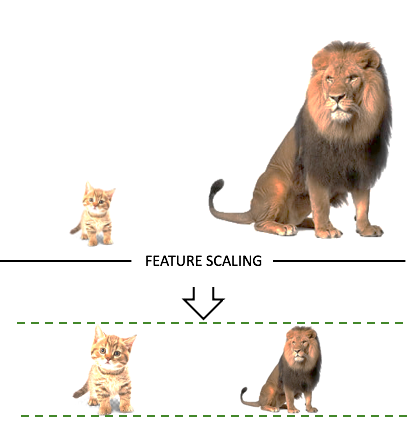

In [ ]:
import numpy as np
import pandas as pd
from sklearn import utils
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target)
y.columns = ['class']

In [ ]:
X.shape # 178 muestras y 13 columnas 

(178, 13)

In [ ]:
# Creamos un dataframe agregando X e y 
df_wine = pd.concat([X, y], axis=1)

In [ ]:
df_wine.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0,2
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
80,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278.0,1
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0,2
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
94,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1
49,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0,0
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1


In [ ]:
df_wine['class'].unique()

array([0, 1, 2])

In [ ]:
# Procesado de los datos -> en este caso simplemente estandarizamos
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Para la estandarización usamos **z-score**:

 $\large{x_{new}=\frac{x_i-\overline{x}}{\sigma}}$

Hace que la media sea 0 y la desviación típica 1.

Existe otros escaladores como 
1. MinMaxScaller: $\large{x_{new}=\frac{x_i-min(x)}{max(x)-min(x)}}$.  NOTA: Lo llamamos **Escalado** en lugar de Estandarización
2. RobustScaler: $\large{x_{new}=\frac{x_i-min(x)}{IQR}}$.  Donde IQR = InterQuartile Range (Q3-Q1) donde están la mitad de las muestras. Este método se suele usar cuando hay valores atípicos (outlayers) y no deseamos eliminarlos.


In [ ]:
X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Estandarización:

La necesidad de la estandarización reside en que si tenemos dos variables y una tiene valores entre 0 y 3000 y la otra entre 0 y 4, el modelo le dará más importancia a la primera. Depende del modelo en tanto que hay modelos que no tienen esta problemática.

Es de vital importancia, sobre todo, antes de aplicar PCA (lo veremos en el tema 4) ya que define sus componentes según la dirección de mayor varianza, por lo tanto no nos interesa un desajuste de las medidas.

**Debería hacerse antes de:** PCA / Clustering / KNN / SVM / LASSO / RIDGE. Y en general, para cualquier algoritmo excepto los árboles de decisión. No siempre se obtienen mejoras en Regresión Lineal.

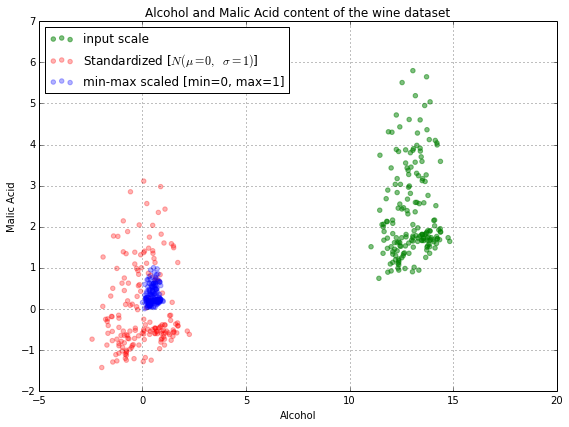

# División en dataset de entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


NOTA: A la hora de normalizar los datos, **se ajusta el escalador sólo sobre los datos de entrenamiento**, y se aplica sobre los conjuntos de entrenamiento y de test:

```
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
```

o
```
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
```

In [ ]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
X_train_std

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ...,
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])